<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/practica22_263166_PracticaRegresionLinealMultiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Laila Montserrat Bulhosen Ramos
*   Matrícula: 263166

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## Parte 1: Carga de datos y bibliotecas
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



In [4]:
df = pd.read_csv('/content/drive/MyDrive/Programacion_ClassFiles/archivos_practicas/advertising.csv')

print('Primeras filas en el dataframe:\n',df.head())

print('\n\nDescripcion estadistica del dataset:\n',df.describe())

print('\nVerificacion de datos nulos:\n')
print(df.info())

Primeras filas en el dataframe:
       TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


Descripcion estadistica del dataset:
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Verificacion de datos nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 no

## Parte 2: Análisis exploratorio de los datos
### 2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.


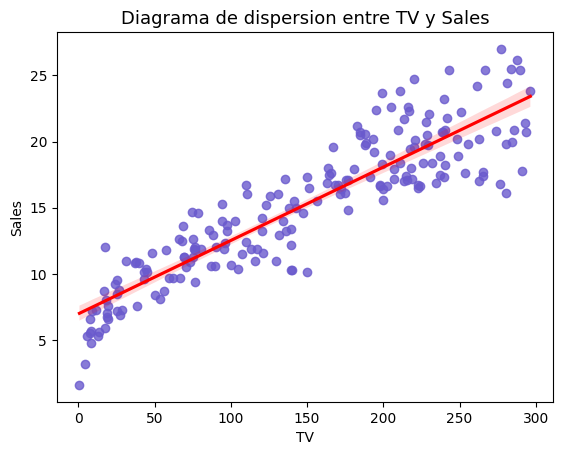

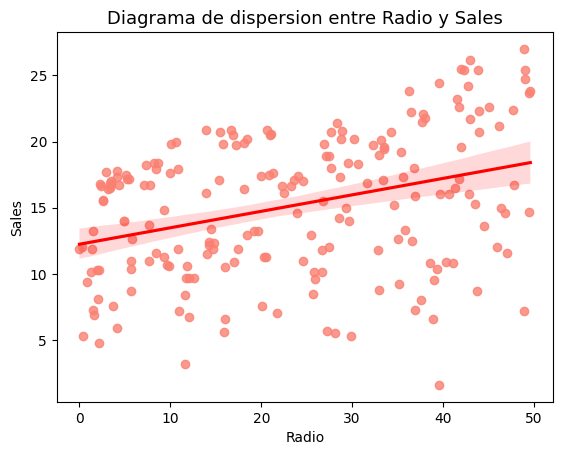

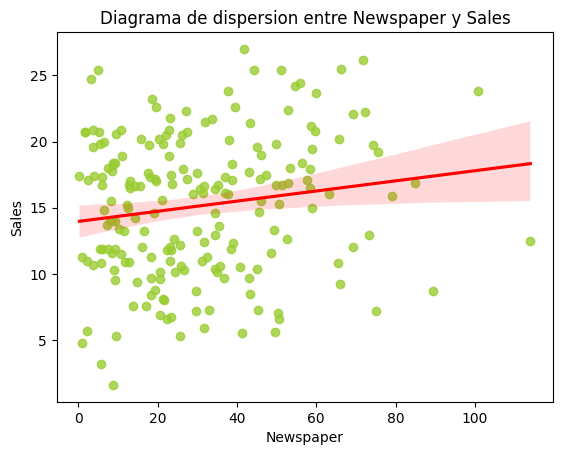

In [24]:
# Gráficos de dispersión

### Scatterplot TV & Sales


sns.regplot(x= df['TV'], y= df['Sales'], scatter_kws={'color':'slateblue'}, line_kws={'color':'red'})
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Diagrama de dispersion entre TV y Sales', size= 13)
plt.show()

### Scatterplot Radio & Sales

sns.regplot(x= df['Radio'], y= df['Sales'], scatter_kws={'color':'salmon'}, line_kws={'color':'red'})
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Diagrama de dispersion entre Radio y Sales', size= 13)
plt.show()

### Scatterplot Newspaper & Sales

sns.regplot(x= df['Newspaper'], y= df['Sales'], scatter_kws={'color':'yellowgreen'}, line_kws={'color':'red'})
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Diagrama de dispersion entre Newspaper y Sales', size= 12)
plt.show()


2. Interpreta visualmente la relación entre variables.

En los tres medios de difusion se puede ver que al final se alcanzaron los niveles más altos de ventas, sin embargo, el uso del periódico fue el más rápido, hubo un menor costo de inversión y se logró llegar a los niveles de 25.

La venta de producto al usar la televisión como medio de difusión fue más lento, y se necesito 10 veces más de inversion para lograr las ventas que logró el periódico con 20 de inversión.

Viendo la recta de regresión podemos notar que en los datos del radio y periódico estan muy dispersos, la gráfica de TV es la que presenta datos mas cercanos a la recta de regresión.





### 2.2: Correlación entre variables
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.


Matriz de correlacion:
                  TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000 



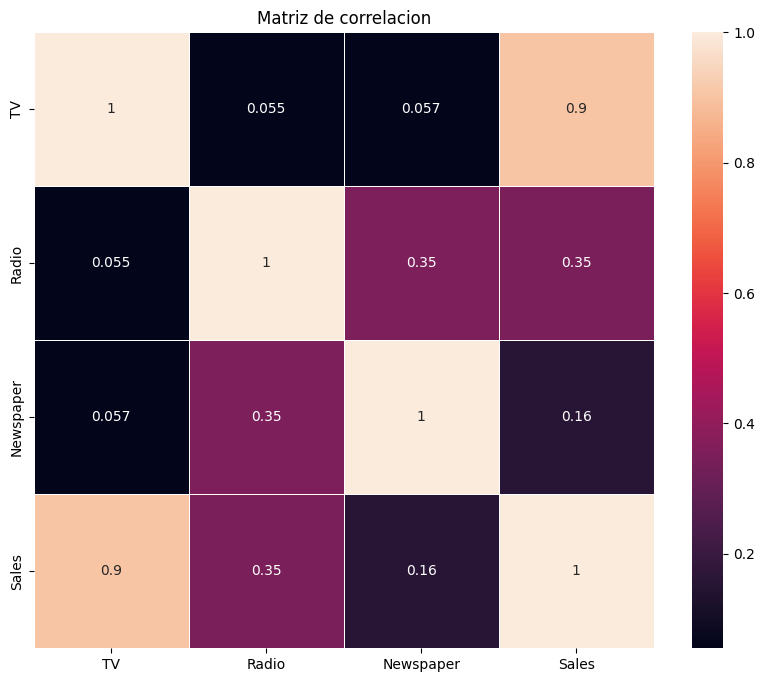

In [6]:
# Correlación y heatmap

matriz_corr = df.corr()
print('Matriz de correlacion:\n',matriz_corr,'\n')

plt.figure(figsize= (10,8))
sns.heatmap(matriz_corr, annot= True, linewidths= 0.5)

plt.title('Matriz de correlacion')
plt.show()

3. Responde: ¿Qué variables están más correlacionadas con `Sales`?

La varible mas relacionada con sales es TV como se vió en las gráficas de dispersión

¿Hay correlación alta entre predictores?

Por lo que se vio en la matriz de correlacion los valores muy bajos algunos muy cercanos a cero nos muestran que no hay una correlación fuerte entre estas variables independientes.

## Parte 3. Multicolinealidad
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

In [27]:
#Multicolinealidad


x = df[['TV', 'Radio', 'Newspaper']]
x = add_constant(x)

vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


## Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación

### 4.1 Entrenamiento del Modelo (Todas las Variables Independientes)

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [8]:
#ntrenamiento del Modelo (Todas las Variables Independientes)

### 4.2 Normalidad de los residuos

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

In [9]:
#Normalidad de los residuos

### 4.3. Homocedasticidad

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

In [10]:
# Homocedasticidad

### 4.4 Q-Q Plot

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

In [11]:
#Q-Q Plot

### 4.5. Evaluación del Modelo

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?


In [12]:
#Evaluación del Modelo

### 4.6. Visualización de Predicciones

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

In [13]:
#Visualización de las Predicciones

### 4.7 Verificar el impacto de los atributos en el modelo

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?


In [14]:
#P-values

##Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

##7. Conclusiones.

¿Cuál de los tres modelos construidos fue el mejor?
¿Cuál fue el atributo que mas influencia tiene en las ventas?